In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [ ]:
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
	'''
	This function plot confusion matrix method from sklearn package.
	'''

	plt.figure(figsize= (10, 10))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title)
	plt.colorbar()

	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 90)
	plt.yticks(tick_marks, classes)

	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')

	else:
		print('Confusion Matrix, Without Normalization')

	print(cm)

	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

In [ ]:
import os
path = '/content/drive/MyDrive'
os.chdir(path)

In [ ]:
!cp vn_f_t.zip /tmp
!unzip -q /tmp/vn_f_t.zip -d /tmp

In [ ]:
TEST_PATH = '/tmp/vn_f_t/Test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
IMAGE_SIZE = (300, 300)
batch_size = 16

In [ ]:
generated_test_data = test_generator.flow_from_directory(TEST_PATH, target_size=IMAGE_SIZE,batch_size=batch_size,
    class_mode='categorical',
    shuffle=False )

Found 5040 images belonging to 30 classes.


In [ ]:
import tensorflow_hub as hub

In [ ]:
model_path_dense1 = '/content/drive/MyDrive/kqcv/duc8245kc3_DenseNet201.hdf5'
model_path_dense2 = '/content/drive/MyDrive/kqcv/duc8245kc4_DenseNet201.hdf5'
model_path_dense3 = '/content/drive/MyDrive/kqcv/duc8245kc5_DenseNet201.hdf5'
model_path_dense4 = '/content/drive/MyDrive/kqcv_hpduc/hpduc82224_DenseNet201.hdf5'
model_path_Xception1 = '/content/drive/MyDrive/kqcv_ducgs/ducgs223_Xception.hdf5'
model_path_Xception2 = '/content/drive/MyDrive/kqcv_ducgs/ducgs224_Xception.hdf5'
model_path_Xception3 = '/content/drive/MyDrive/kqcv_ducgs/ducgs225_Xception.hdf5'
model_path_Xception4 = '/content/drive/MyDrive/kqcv_21022015/210220154_Xception.hdf5'
model_path_ConVNext = '/content/drive/MyDrive/kqcv_duckhsr/duckhsr5_ConvNeXtBase.hdf5'

# Tải mô hình đã huấn luyện
model1 = tf.keras.models.load_model(model_path_dense1)
model2 = tf.keras.models.load_model(model_path_dense2)
model3 = tf.keras.models.load_model(model_path_dense3)
model4 = tf.keras.models.load_model(model_path_dense4)
model5 = tf.keras.models.load_model(model_path_Xception1)
model6 = tf.keras.models.load_model(model_path_Xception2)
model7 = tf.keras.models.load_model(model_path_Xception3)
model8 = tf.keras.models.load_model(model_path_Xception4)
# model9 = tf.keras.models.load_model(
#        (model_path_ConVNext),
#        custom_objects={'KerasLayer':hub.KerasLayer}
# )


In [ ]:
preds1 = model1.predict(generated_test_data)
y_pred1 = np.argmax(preds1, axis=1)

preds2 = model2.predict(generated_test_data)
y_pred2 = np.argmax(preds2, axis=1)

preds3 = model3.predict(generated_test_data)
y_pred3 = np.argmax(preds3, axis=1)

preds4 = model4.predict(generated_test_data)
y_pred4 = np.argmax(preds4, axis=1)

preds5 = model5.predict(generated_test_data)
y_pred5 = np.argmax(preds5, axis=1)

preds6 = model6.predict(generated_test_data)
y_pred6 = np.argmax(preds6, axis=1)

preds7 = model7.predict(generated_test_data)
y_pred7 = np.argmax(preds7, axis=1)

preds8 = model8.predict(generated_test_data)
y_pred8 = np.argmax(preds8, axis=1)

# preds9 = model9.predict(generated_test_data)
# y_pred9 = np.argmax(preds9, axis=1)

315/315 [==============================] - 71s 222ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import itertools

Confusion Matrix, Without Normalization
[[104   5   3   0   0   5   4   3   0   0   0   0   1   0   0   0   0   1
    0   0   0   0   0   1   0   0   1   0   0   1]
 [  4  94   1   1   0   9   3   3   0   0   0   0   0   1   1   2   0   2
    2   0   5   0   7   0   1   2   1   2   1   2]
 [  0   0 123   3   1   3   0   2   4   1   0   1   0   0   0   1   0   1
    0   0   0   1   3   0   1   0   3   0   0   1]
 [  0   0   0  92   0   1   2   0   0   0   0   0   0   0  22   0   7  12
    1   0  14   2  12   0   0  14   4   0  10   0]
 [  0   1   1   0  79   0   0   2   0   1   1   9   2   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   6   0   0]
 [  0   4   4   0   1 180   5   2   1   2   0   0   0   2   3   2   0   2
    0   0   1   3   4   3   4   1   1   2   0   1]
 [  4   4   1   3   0  10  53  11   0   0   1   0   3   0   2   1   1   6
    5   1   0   1  13   2   0   5   0   3   2   1]
 [  0   0   0   0   0   3   5 116   0   0   0   0   1   0   0   1   0   0
    0   1  

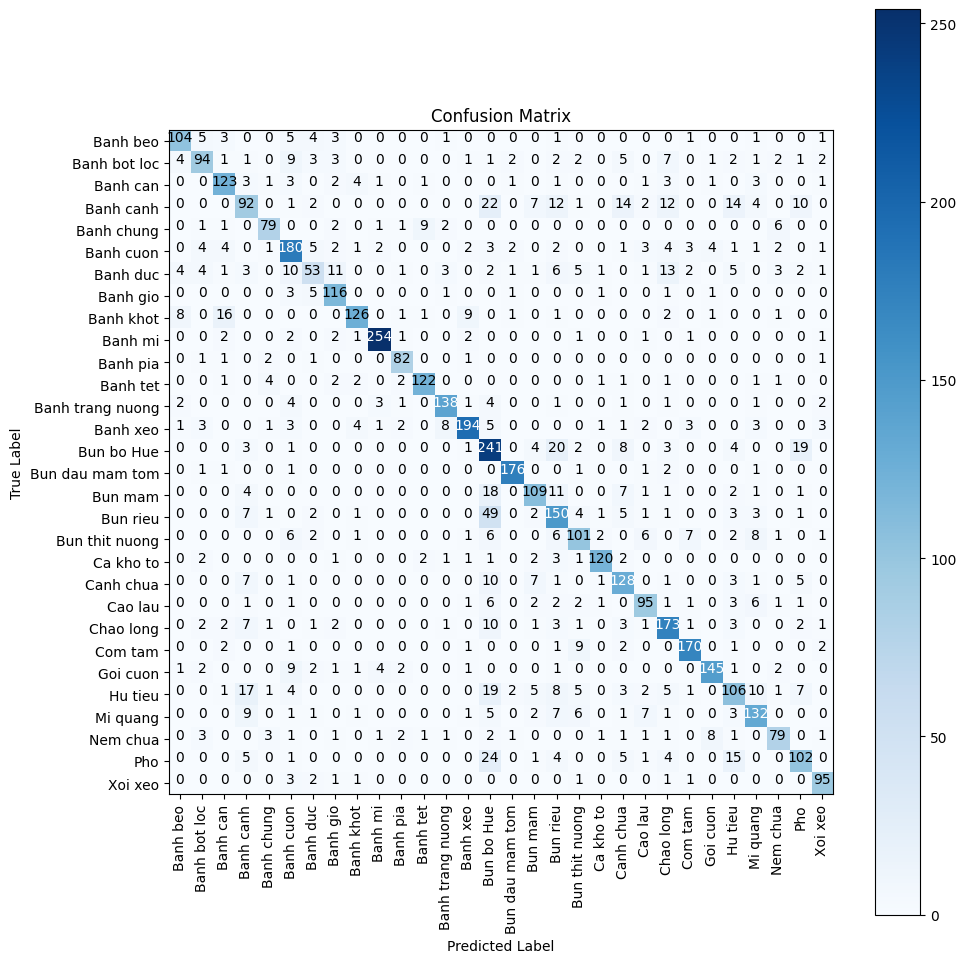

In [ ]:
g_dict = generated_test_data.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(generated_test_data.classes, y_pred1)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(generated_test_data.classes, y_pred1, target_names= classes))

Confusion Matrix, Without Normalization
[[103   6   2   0   0   3   8   2   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   1   0   0   1   0   0   2]
 [  4 106   0   1   0   9   1   1   0   0   0   0   0   0   1   2   1   1
    2   0   3   0   3   1   1   3   1   3   0   0]
 [  0   1 125   3   1   3   1   1   3   0   0   1   0   1   0   2   0   2
    0   0   0   0   3   0   0   0   1   0   0   1]
 [  0   0   0  92   0   0   1   0   0   0   0   0   0   0  17   0   8  13
    4   0  12   1  16   0   0  13   4   0  12   0]
 [  0   0   1   0  83   0   0   2   0   0   2   5   2   1   0   0   0   0
    0   0   0   0   0   0   0   0   0   6   0   0]
 [  0   9   3   1   1 180   4   2   1   1   0   0   0   1   1   2   0   3
    3   0   0   3   3   1   4   0   1   3   0   1]
 [  3   6   1   2   0  11  54   7   0   0   1   1   3   1   1   0   1   6
    9   1   0   1  11   1   0   4   1   3   3   1]
 [  1   0   0   0   0   4   3 113   0   1   0   0   1   1   0   1   0   0
    0   1  

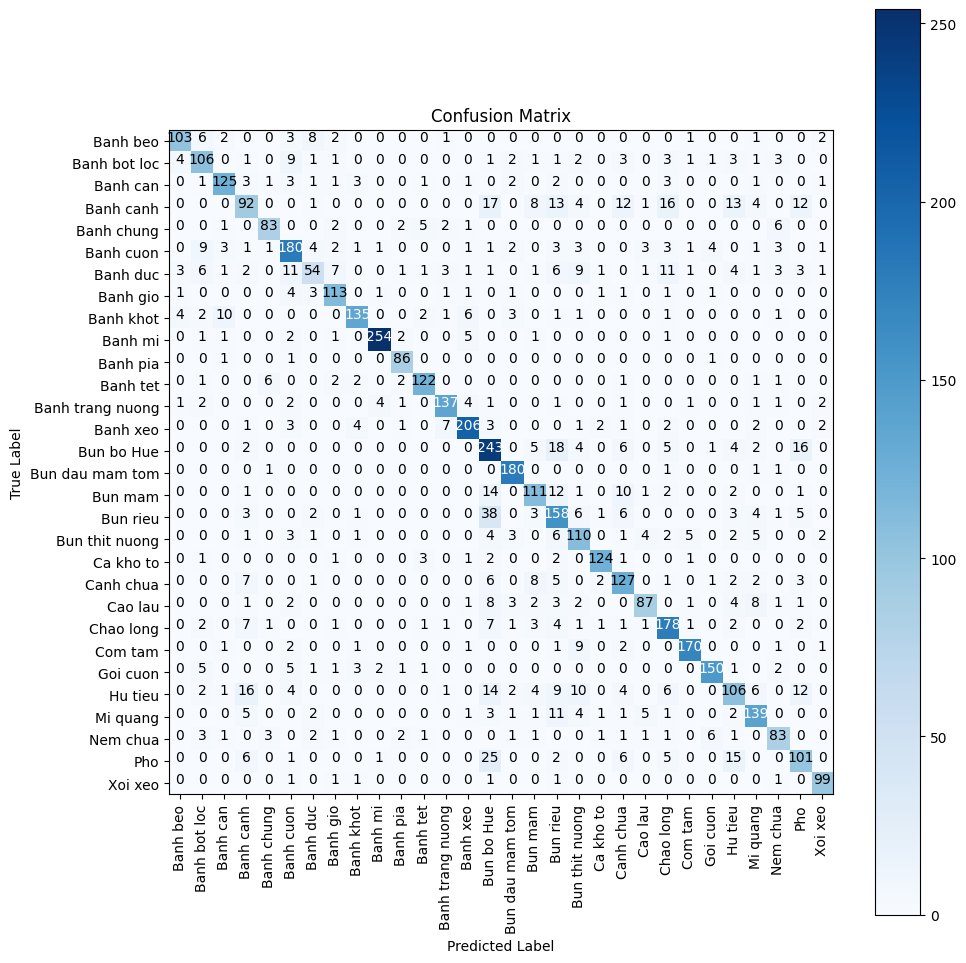

In [ ]:
# Confusion matrix
cm = confusion_matrix(generated_test_data.classes, y_pred2)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(generated_test_data.classes, y_pred2, target_names= classes))

Confusion Matrix, Without Normalization
[[ 99   7   3   0   0   4   8   1   1   0   0   0   1   0   0   0   0   0
    0   0   1   0   0   2   0   0   1   0   0   1]
 [  3 103   0   2   0   9   2   1   0   0   0   0   0   0   2   2   0   1
    1   0   2   0   6   0   1   4   1   2   1   1]
 [  0   1 121   2   1   2   2   1   9   0   0   0   0   1   0   1   0   3
    0   0   0   0   2   0   0   1   0   0   0   2]
 [  0   0   0  97   0   1   2   0   0   0   0   0   0   0  26   0   7   9
    1   0  13   1  12   0   0  11   2   0  11   0]
 [  0   2   0   0  84   0   0   1   0   0   1   6   2   2   0   0   0   0
    0   0   0   0   0   0   0   0   0   4   0   0]
 [  0   8   2   0   0 177   6   0   2   2   1   0   1   1   3   2   0   2
    1   0   1   4   4   2   4   1   2   1   0   1]
 [  3   6   3   1   0  11  68   5   1   0   0   0   1   1   1   0   0   4
    5   1   1   3   9   0   0   1   0   3   3   2]
 [  0   2   0   0   0   3   4 112   0   1   0   0   1   1   0   1   0   0
    0   1  

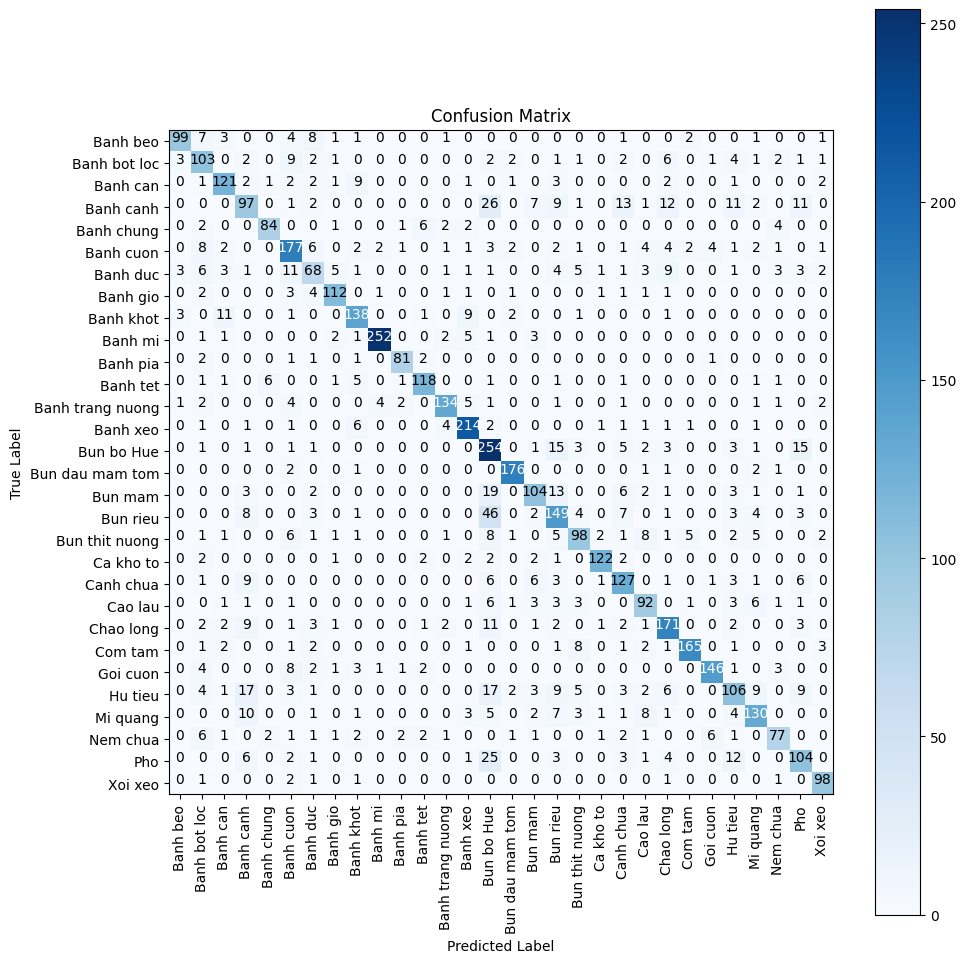

In [ ]:
# Confusion matrix
cm = confusion_matrix(generated_test_data.classes, y_pred3)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(generated_test_data.classes, y_pred3, target_names= classes))

Confusion Matrix, Without Normalization
[[101   9   1   0   0   4   6   3   0   0   0   0   1   0   0   0   0   0
    0   0   0   1   0   1   0   0   1   0   0   1]
 [  4 106   0   1   0   6   1   2   0   0   0   0   0   1   2   2   0   1
    2   0   1   0   3   0   1   6   0   3   0   2]
 [  0   0 116   2   1   2   1   1   7   1   0   0   0   4   0   0   0   3
    1   0   0   0   3   0   1   2   2   0   0   2]
 [  0   0   0  74   0   0   2   0   0   0   0   0   0   0  17   0   9  18
    0   0  10   1  13   0   0  30   6   0  13   0]
 [  0   0   0   0  85   0   0   2   0   0   2   5   2   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   4   0   2]
 [  0   9   2   0   2 173   5   2   2   2   1   0   0   1   1   2   0   3
    0   0   0   7   4   3   5   0   2   1   0   1]
 [  3   7   1   1   0  10  57   6   1   0   1   0   2   1   1   0   0   6
    5   1   1   1  11   1   0   8   1   3   2   2]
 [  0   1   0   0   0   2   5 115   0   1   0   0   1   1   0   0   0   0
    0   0  

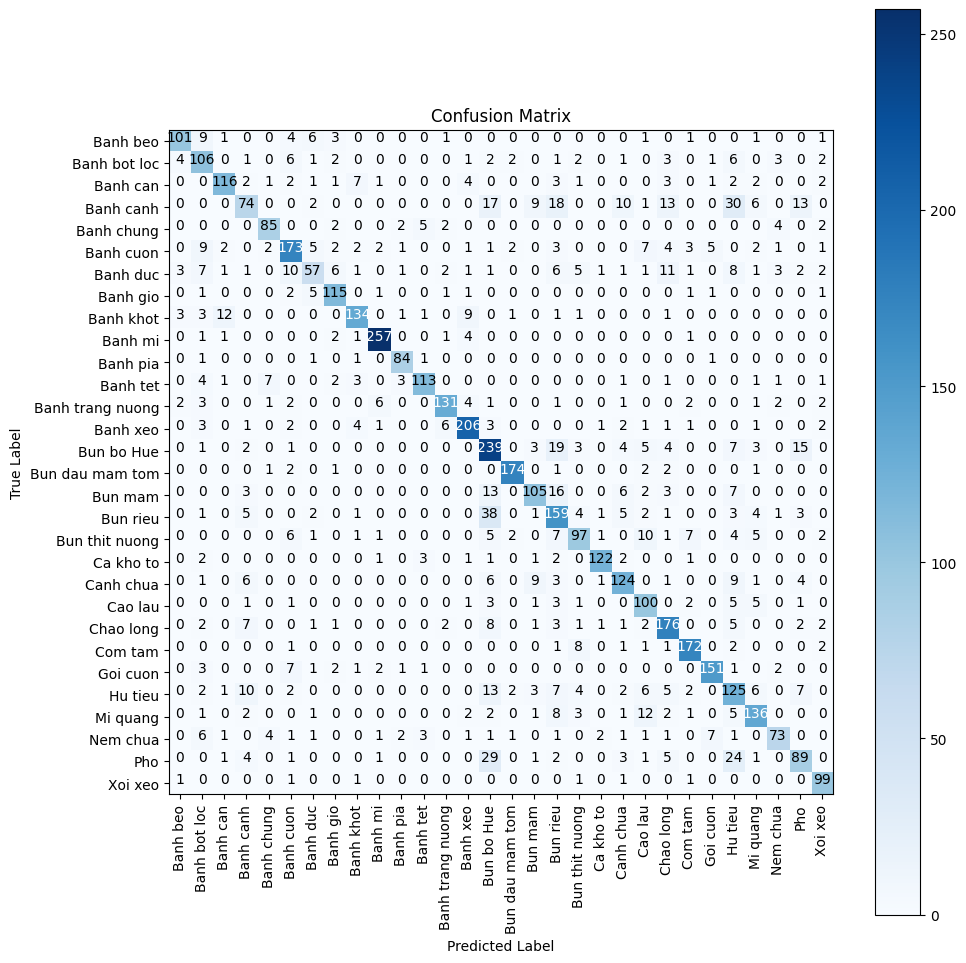

In [ ]:
# Confusion matrix
cm = confusion_matrix(generated_test_data.classes, y_pred4)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(generated_test_data.classes, y_pred4, target_names= classes))

Confusion Matrix, Without Normalization
[[ 98   9   2   0   0   2   2   4   0   0   1   0   2   0   0   1   0   0
    1   0   0   0   3   2   1   1   0   0   0   0]
 [  9  89   0   3   0   8   3   1   3   0   0   0   0   0   0   1   1   1
    2   2   3   0   2   0   5   4   3   3   0   1]
 [  3   0 119   2   0   2   0   0   7   0   0   1   0   2   1   0   1   0
    1   0   0   5   2   0   1   1   1   0   0   0]
 [  1   1   1  68   0   1   4   0   0   2   0   0   0   0  13   0  14  17
    1   2  14   4  21   0   0  19   5   0   5   0]
 [  0   0   0   0  79   0   0   1   0   0   0  12   1   1   1   0   0   0
    0   0   0   1   0   0   1   0   0   4   0   1]
 [  1   4   5   3   1 155   4   5   0   1   2   0   3   1   1   1   0   0
    3   1   0   6   7   4  10   4   3   2   1   0]
 [  4   7   3   2   1  12  53   6   0   0   1   0   4   0   0   0   0   4
    1   0   2   3  16   2   1   2   5   2   1   1]
 [  0   4   0   0   0   5   3 109   1   0   0   0   1   1   0   0   0   0
    0   0  

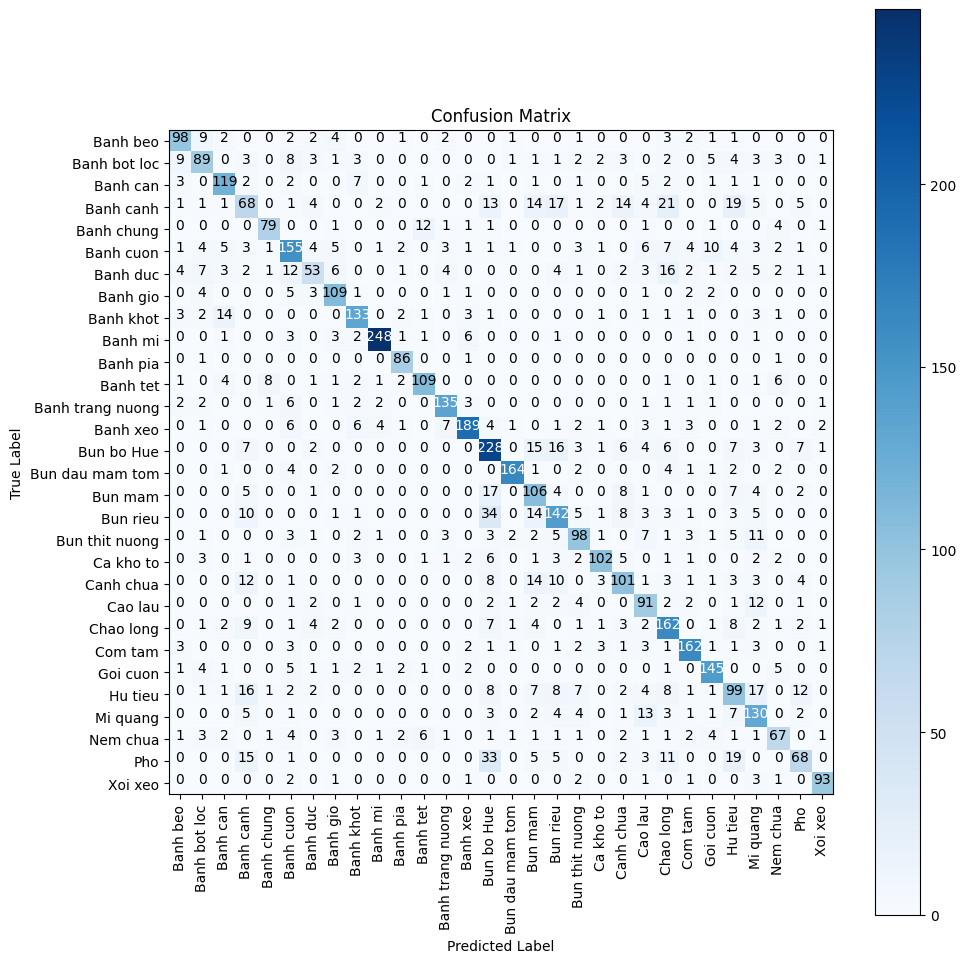

In [ ]:
# Confusion matrix
cm = confusion_matrix(generated_test_data.classes, y_pred5)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(generated_test_data.classes, y_pred5, target_names= classes))

Confusion Matrix, Without Normalization
[[ 98  10   2   0   0   4   3   2   0   0   0   0   1   0   0   1   0   0
    1   0   0   1   3   1   2   0   0   0   0   0]
 [  7  92   0   4   0   6   2   1   4   0   0   0   0   0   0   1   0   0
    2   0   4   0   3   1   4   2   6   4   0   1]
 [  2   2 113   3   0   1   1   0   6   0   1   3   0   2   2   0   1   0
    1   0   0   4   3   1   2   0   1   0   0   0]
 [  0   2   1  82   0   1   5   0   0   2   0   0   0   0   9   0  15  16
    1   2  12   2  16   0   0  12   6   0   9   0]
 [  0   0   0   0  83   0   0   2   0   0   1   8   1   0   0   0   0   0
    0   0   0   1   0   0   1   0   0   4   0   1]
 [  2   5   3   3   1 157   6   5   1   1   1   0   3   1   2   2   2   0
    1   1   0   4   6   3  10   4   1   2   1   0]
 [  4   6   3   2   1  11  62   5   0   0   2   1   4   0   0   0   1   7
    0   0   1   1  12   1   1   3   3   1   1   0]
 [  0   3   0   0   0   4   2 108   0   1   0   0   4   1   0   0   0   0
    0   0  

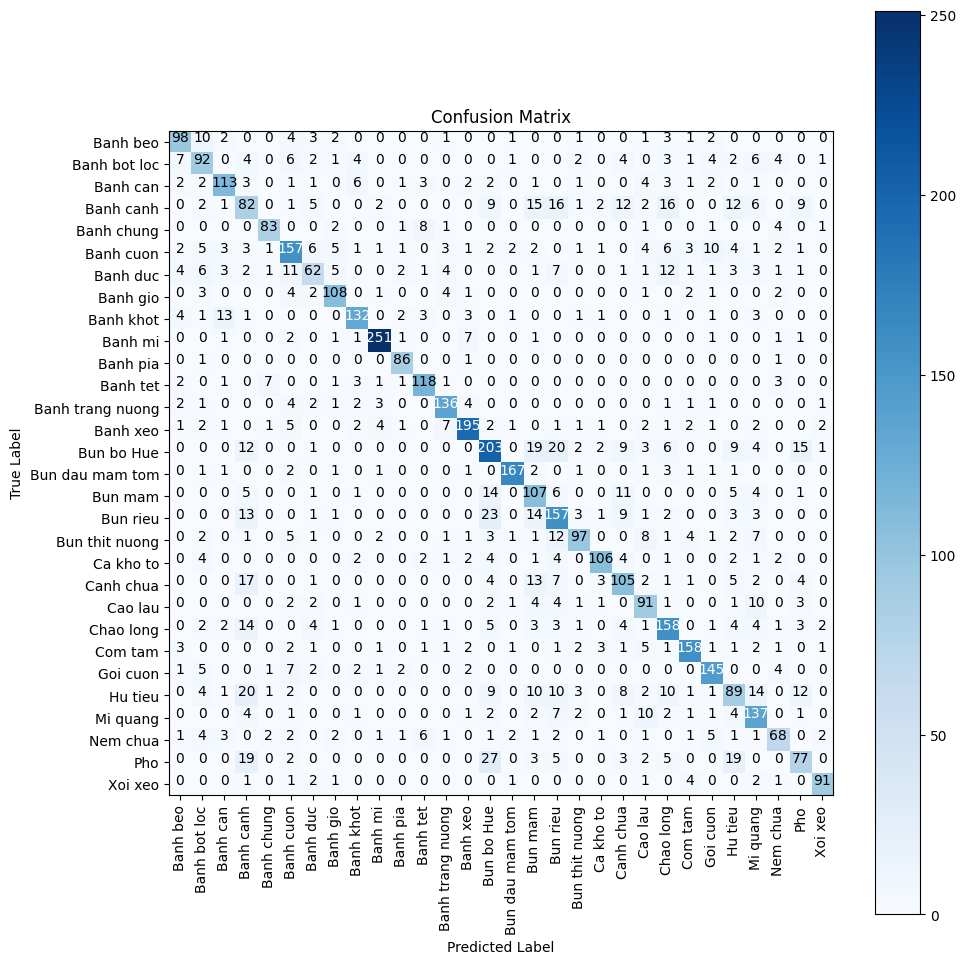

In [ ]:
# Confusion matrix
cm = confusion_matrix(generated_test_data.classes, y_pred6)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(generated_test_data.classes, y_pred6, target_names= classes))

Confusion Matrix, Without Normalization
[[ 98  10   1   1   0   4   5   4   0   0   0   0   0   0   0   1   0   0
    1   0   0   0   2   1   1   0   0   0   0   0]
 [  5 100   0   2   0   7   5   1   4   0   1   0   0   0   0   0   0   0
    1   0   2   0   1   1   3   3   3   4   0   1]
 [  3   1 106   2   0   3   1   0  10   0   2   3   0   2   3   0   1   0
    1   0   0   3   3   2   1   1   1   0   0   0]
 [  0   2   0  76   0   2   5   0   0   2   0   0   0   0  13   0  16  11
    2   2  11   2  16   0   0  15   5   1  12   0]
 [  0   0   0   0  78   0   1   1   0   1   0   8   1   1   1   1   0   0
    0   0   0   1   0   0   0   0   0   7   0   1]
 [  0   3   1   3   1 165   7   6   1   0   1   0   2   1   2   2   0   0
    1   1   0   3   4   2  13   2   2   4   1   0]
 [  3   8   1   3   2  12  64   4   0   0   1   0   4   0   0   0   0   5
    1   0   2   2   9   1   2   3   2   2   1   1]
 [  0   3   0   0   0   4   4 108   0   0   0   0   2   2   0   1   0   0
    1   0  

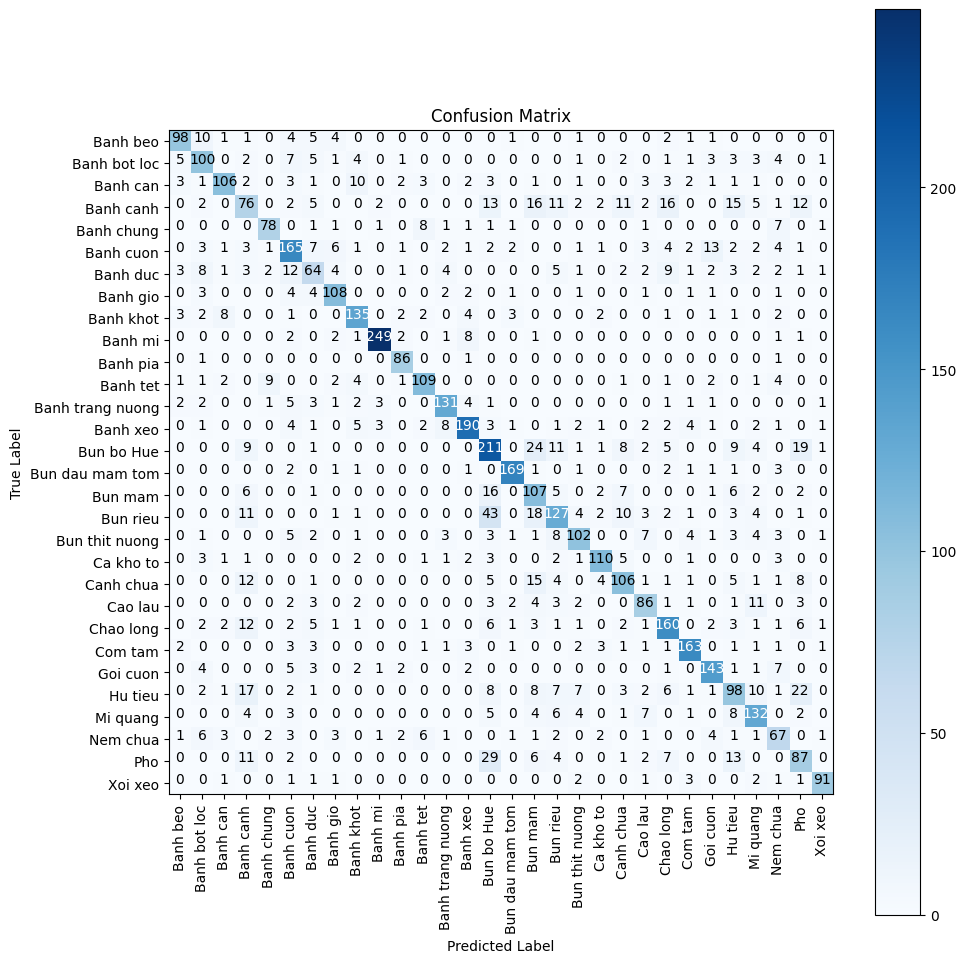

In [ ]:
# Confusion matrix
cm = confusion_matrix(generated_test_data.classes, y_pred7)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(generated_test_data.classes, y_pred7, target_names= classes))

Confusion Matrix, Without Normalization
[[ 96   9   2   1   0   2   5   3   0   0   0   0   1   0   0   1   0   0
    1   0   0   1   4   1   2   0   0   0   0   0]
 [  7  93   0   2   0   6   3   1   3   0   0   0   0   0   0   0   0   1
    2   0   4   0   5   1   3   5   3   4   0   1]
 [  3   2 113   3   0   0   1   0   9   0   0   4   0   1   2   0   0   0
    1   0   0   3   2   2   0   2   1   0   0   0]
 [  0   2   0  81   0   1   1   0   0   2   0   0   0   0   8   0   9   9
    1   2  10   3  18   0   0  21   6   0  19   0]
 [  0   0   0   0  84   0   0   1   0   0   0   9   1   0   1   0   0   0
    0   0   0   1   0   0   0   0   0   4   0   1]
 [  0   6   1   2   1 158   6   6   1   0   1   0   1   0   1   4   0   0
    3   1   0   5   5   6   7   4   2   5   2   0]
 [  1   5   4   2   1  15  60   5   3   0   0   0   2   1   0   0   1   3
    2   0   2   1  12   2   0   2   4   3   2   0]
 [  0   1   0   0   0   6   4 110   0   0   0   1   2   1   0   1   0   0
    0   0  

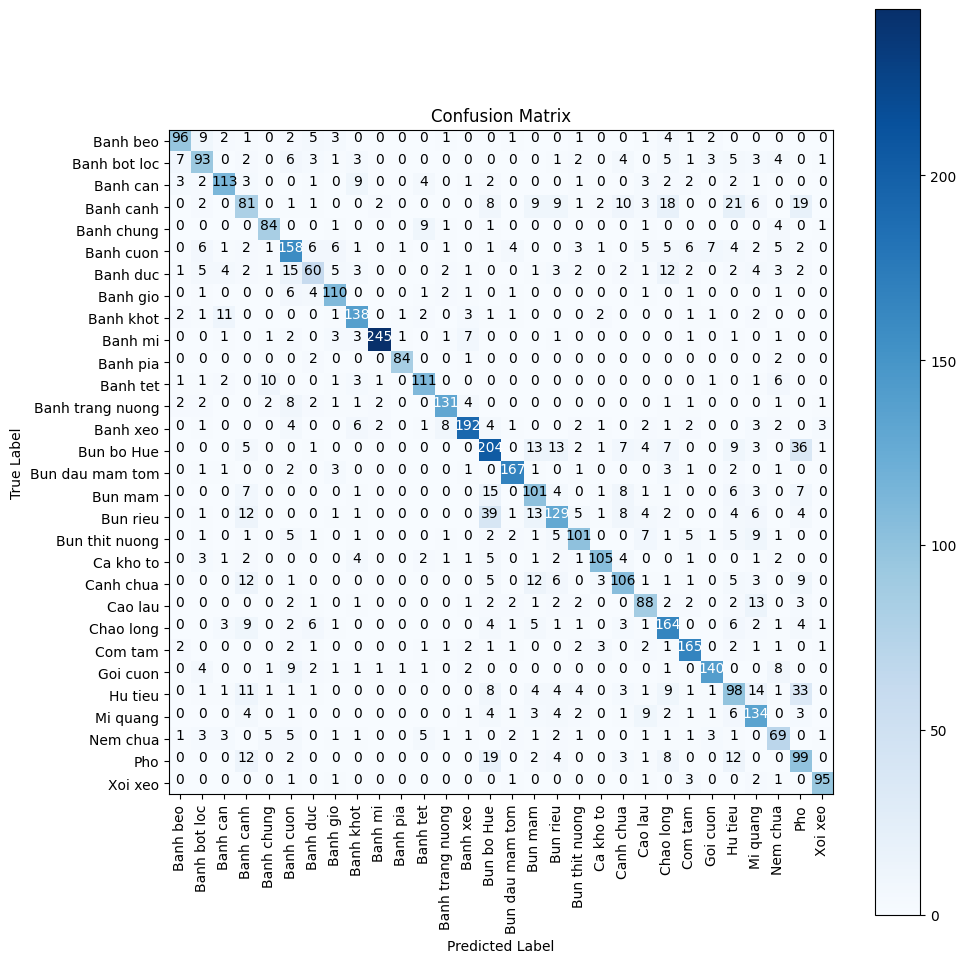

In [ ]:
# Confusion matrix
cm = confusion_matrix(generated_test_data.classes, y_pred8)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(generated_test_data.classes, y_pred8, target_names= classes))

In [ ]:
# # Confusion matrix
# cm = confusion_matrix(generated_test_data.classes, y_pred9)
# plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# # Classification report
# print(classification_report(generated_test_data.classes, y_pred9, target_names= classes))

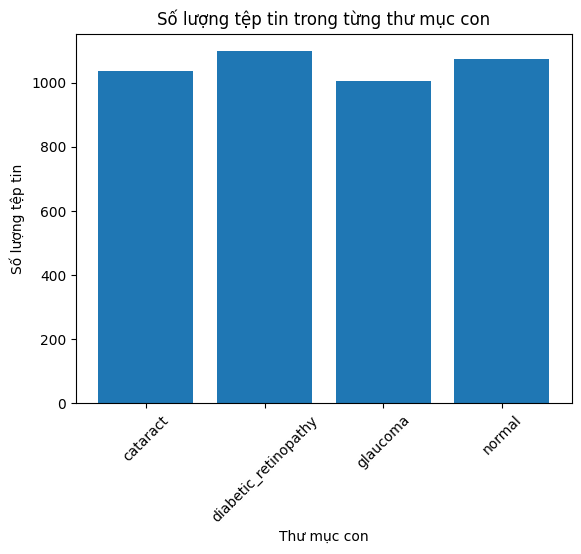

In [ ]:
# import os
# import matplotlib.pyplot as plt

# # Đường dẫn đến thư mục gốc
# base_dir = '/content/drive/MyDrive/NLMH136/dataset'

# # Tạo danh sách để lưu số lượng tệp tin cho từng thư mục con
# file_counts = []

# # Lặp qua từng thư mục con trong thư mục gốc
# for folder_name in os.listdir(base_dir):
#     folder_path = os.path.join(base_dir, folder_name)
#     if not os.path.isdir(folder_path):
#         continue

#     # Đếm số lượng tệp tin trong thư mục con
#     file_count = len(os.listdir(folder_path))
#     file_counts.append(file_count)

# # Chuẩn bị dữ liệu cho biểu đồ cột
# x_labels = os.listdir(base_dir)
# x = range(len(x_labels))

# # Vẽ biểu đồ cột
# plt.bar(x, file_counts)
# plt.xticks(x, x_labels, rotation=45)
# plt.xlabel('Thư mục con')
# plt.ylabel('Số lượng tệp tin')
# plt.title('Số lượng tệp tin trong từng thư mục con')
# plt.show()


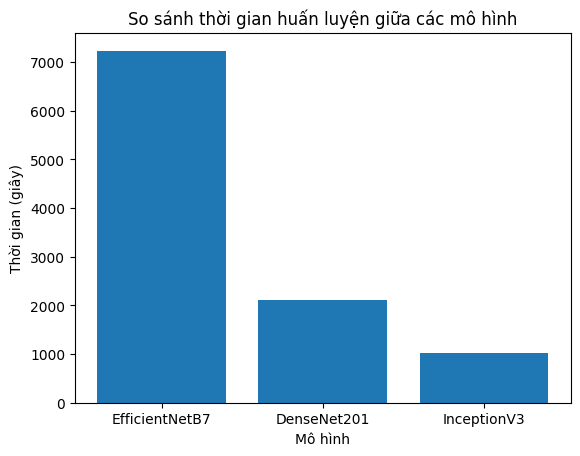

In [ ]:


# # Dữ liệu thời gian (ví dụ)
# labels = ['EfficientNetB7', 'DenseNet201', 'InceptionV3']
# times = [7234, 2117, 1020]  # Thời gian (giả định) cho mỗi mô hình

# # Vẽ sơ đồ cột
# plt.bar(labels, times)

# # Đặt nhãn và tiêu đề cho sơ đồ
# plt.xlabel('Mô hình')
# plt.ylabel('Thời gian (giây)')
# plt.title('So sánh thời gian huấn luyện giữa các mô hình')

# # Hiển thị sơ đồ
# plt.show()
